### Go through all candor files

In [54]:
import os
import pandas as pd
import numpy as np
from tqdm import notebook
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_rel, kstest

In [2]:
rootdir = '../candor'
print(rootdir)

../candor


In [3]:
transcript = []
for subdir, dirs, files in notebook.tqdm(os.walk(rootdir)):
    for file in files:
        if file=="transcript_backbiter.csv":
            current_csv = pd.read_csv(os.path.join(subdir, file))
            transcript.append(current_csv)

0it [00:00, ?it/s]

In [4]:
transcript[1]["backchannel_start"]

0         9.74
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
195        NaN
196        NaN
197    1489.84
198        NaN
199    1561.04
Name: backchannel_start, Length: 200, dtype: float64

### Identify all times when backchannel occurs (regardless of speakers)

In [7]:
transcript[1]["backchannel_stop"] - transcript[1]["backchannel_start"]

0       2.52
1        NaN
2        NaN
3        NaN
4        NaN
       ...  
195      NaN
196      NaN
197    60.81
198      NaN
199     0.51
Length: 200, dtype: float64

### EDA

In [9]:
backchannel_duration = []
for i, trans in enumerate(notebook.tqdm(transcript)): ##i stands for index of the file, trans stands for file
    diff = trans["backchannel_stop"] - trans["backchannel_start"] ##all diff in a file
    backchannel_duration.append(diff[~np.isnan(diff)])

  0%|          | 0/1656 [00:00<?, ?it/s]

In [10]:
backchannel_duration[0]

5      1.02
10     3.42
11     0.71
12     0.62
17     0.81
       ... 
428    2.21
434    1.64
436    0.26
437    0.66
440    1.18
Length: 135, dtype: float64

Text(0.5, 1.0, 'Backchannel Duration')

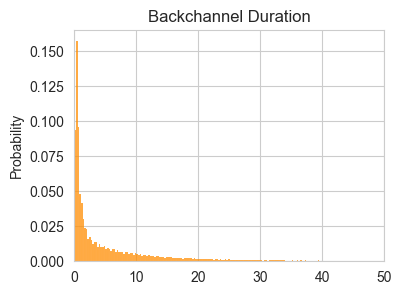

In [16]:
fig, ax = plt.subplots(1, 1, figsize = (4, 3))
sns.histplot(np.hstack(backchannel_duration),stat="probability", color="darkorange", ax=ax)
ax.set_xlim([0, 50])
ax.set_title("Backchannel Duration")

In [17]:
## compare backchannel with the lowest 25 and the highest 25
## first load the survey.csv
survey_list = []
for subdir, dirs, files in notebook.tqdm(os.walk(rootdir)):
    for file in files:
        if file=="survey.csv":
            current_csv = pd.read_csv(os.path.join(subdir, file))
            survey_list.append(current_csv)

0it [00:00, ?it/s]

In [18]:
conversationalist_score=[]
for i, survey in enumerate(notebook.tqdm(survey_list)):
    conversationalist_score.append(survey["conversationalist"])

  0%|          | 0/1656 [00:00<?, ?it/s]

In [20]:
avg_score = np.nanmean(conversationalist_score, axis=1) ##two people to one
avg_score_nonan = avg_score[~np.isnan(avg_score)]

/var/folders/5m/4tj5fx915fv1z073c22c2q7m0000gn/T/ipykernel_12678/2745051805.py:1: RuntimeWarning: Mean of empty slice
  avg_score = np.nanmean(conversationalist_score, axis=1) ##two people to one


In [22]:
backchannel_low_list = []
backchannel_high_list = []
for i, survey in enumerate(notebook.tqdm(survey_list)):
    if np.mean(survey["conversationalist"]) >= np.percentile(avg_score_nonan,75):
        backchannel_high_list.append(backchannel_duration[i])
    elif np.mean(survey["conversationalist"]) <= np.percentile(avg_score_nonan,25):
        backchannel_low_list.append(backchannel_duration[i])


  0%|          | 0/1656 [00:00<?, ?it/s]

In [23]:
backchannel_low_list

[0       3.50
 3       0.21
 4       3.13
 6       0.83
 13      6.81
        ...  
 373     0.28
 374    11.43
 376     0.61
 381     0.36
 385     1.98
 Length: 128, dtype: float64,
 0      0.41
 3      0.32
 7      8.98
 8      1.71
 12     0.32
        ... 
 231    0.23
 237    3.72
 238    0.30
 244    0.32
 247    1.40
 Length: 100, dtype: float64,
 0       5.92
 2       0.32
 5       2.70
 13      0.21
 18      0.32
        ...  
 159     0.33
 161    41.55
 163    47.63
 168     2.81
 169     0.45
 Length: 66, dtype: float64,
 0       0.21
 7       1.22
 9       2.61
 14      0.66
 15     16.31
        ...  
 165     1.48
 166     2.66
 167    21.31
 170     0.57
 171     0.50
 Length: 67, dtype: float64,
 0      7.40
 3      0.26
 8      3.22
 9      1.22
 14     0.37
        ... 
 214    0.47
 218    4.11
 222    2.42
 227    0.41
 228    0.42
 Length: 100, dtype: float64,
 0       1.32
 4       3.81
 8       0.95
 11     17.62
 14      1.23
 17      0.41
 19      7.41
 21   

In [25]:
np.hstack(backchannel_low_list), np.hstack(backchannel_low_list)


(array([ 3.5 ,  0.21,  3.13, ..., 32.42,  1.03,  0.67]),
 array([ 3.5 ,  0.21,  3.13, ..., 32.42,  1.03,  0.67]))

In [27]:
a = np.hstack(backchannel_low_list)
b = np.hstack(backchannel_high_list)
np.hstack((a, b))

array([ 3.5 ,  0.21,  3.13, ..., 19.3 ,  0.34,  0.32])

In [43]:
data_dict = {'Condition':
                 np.hstack([np.repeat(['Low'], len(np.hstack(backchannel_low_list))),
                np.repeat(['High'], len(np.hstack(backchannel_high_list)))]),
             'Duration':
                 np.hstack((a, b))
             }
# print(data_dict)
df1 = pd.DataFrame(data_dict)

In [29]:
print(df1)

       Condition  Duration
0            Low      3.50
1            Low      0.21
2            Low      3.13
3            Low      0.83
4            Low      6.81
...          ...       ...
100060      High      7.85
100061      High      6.51
100062      High     19.30
100063      High      0.34
100064      High      0.32

[100065 rows x 2 columns]


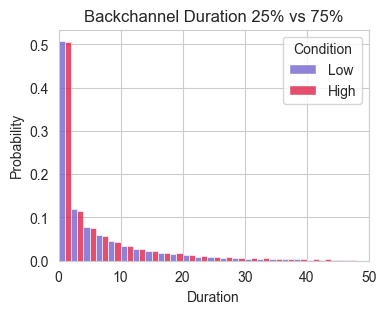

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
sns.histplot(df1, x='Duration', hue='Condition', multiple='dodge', ax=ax, stat="probability", bins=np.arange(0,50,2), palette=("slateblue","crimson"), common_norm=False)
ax.set_xlim([0, 50])
ax.set_title("Backchannel Duration 25% vs 75%")

fig.savefig("../figures/backchannel_selected_duration.png", dpi=600)

Backchannel response looks very equal. Comparably, the LOW duration response is shorter than the HIGH one.

### since we only know in the beginning LOW is higher than LOW, it is hard to predict (whe at 50 as shown above etc), we want to know if the mean is different.

### so we conduct a Cumulative Plot

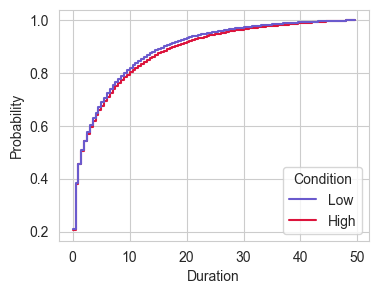

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(4,3))
sns.histplot(df1, x='Duration', hue='Condition', cumulative=True, ax=ax, stat="probability", bins=np.arange(0,50,0.5), common_norm=False, element='step', fill=False, palette=("slateblue","crimson"))

fig.savefig("../figures/backchannel_selected_cumulative_duration.png", dpi=600)

### the HIGH individual conversation (when conversation is more interacive) seems to have a longer backchannel response

In [63]:
kstest(a[a<50], b[b<50])

KstestResult(statistic=0.01879009835317136, pvalue=5.925692726841062e-08, statistic_location=12.82000000000005, statistic_sign=1)

### use audio&video features to predict backchannel yes/ no